In [1]:
import os
os.environ['J_NOTEBOOK'] = '1'


from preprocess.preprocess import *
import PARAMETERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from confusion_matrix_pretty_print import print_confusion_matrix

%matplotlib inline

In [2]:
PARAMETERS.LBP_METHOD = 'default'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.GRAY_INTENSITY = False
PARAMETERS.X2SCALE = False
PARAMETERS.CHANNEL = None
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = True

pd.DataFrame({k: getattr(PARAMETERS, k) for k in VALID_PARAMETERS.keys()}, index=['Parameters']).head()

,LBP_METHOD,METHOD,INTERPOLATION_ALGORITHM,BALANCE,N_SCALES,GRAY_INTENSITY,X2SCALE
Parameters,default,get_pyramid_dataset,lanczos,False,1,False,False


In [3]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for r in range(2, 5):
    db_path = f'../DB/{PARAMETERS.DATASET}/extra_features/radius/{r}'
    for filename in Path(db_path).glob('train_train_*'):   
        file_extension = \
            str(filename).replace('train_train_', '').split('/')[-1].replace('.pkl', '')
        properties = file_extension.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        lbp_method = properties[0]
        if lbp_method == 'default':
            df_train_temp = pd.read_pickle(filename, compression='gzip')
            df_test_temp = pd.read_pickle(str(filename).replace('train_train', 'train_test'), compression='gzip')
            df_train_temp = df_train_temp.drop(['Original', 'label'], axis=1)
            df_test_temp = df_test_temp.drop(['Original', 'label'], axis=1)
            df_train_temp.columns = [f'1:1_{lbp_method}_{r}']
            df_test_temp.columns = [f'1:1_{lbp_method}_{r}']
            df_train = pd.concat([df_train, df_train_temp], axis=1)
            df_test = pd.concat([df_test, df_test_temp], axis=1)

In [4]:
df_train

,1:1_default_2,1:1_default_3,1:1_default_4
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,0,0
...,...,...,...
226537,254,254,254
226538,254,254,254
226539,254,254,254
226540,254,254,254


## Cálculo con la escala original a diferentes radios

Columns: Index(['default_1:1', '1:1_default_2', '1:1_default_3', '1:1_default_4'], dtype='object')


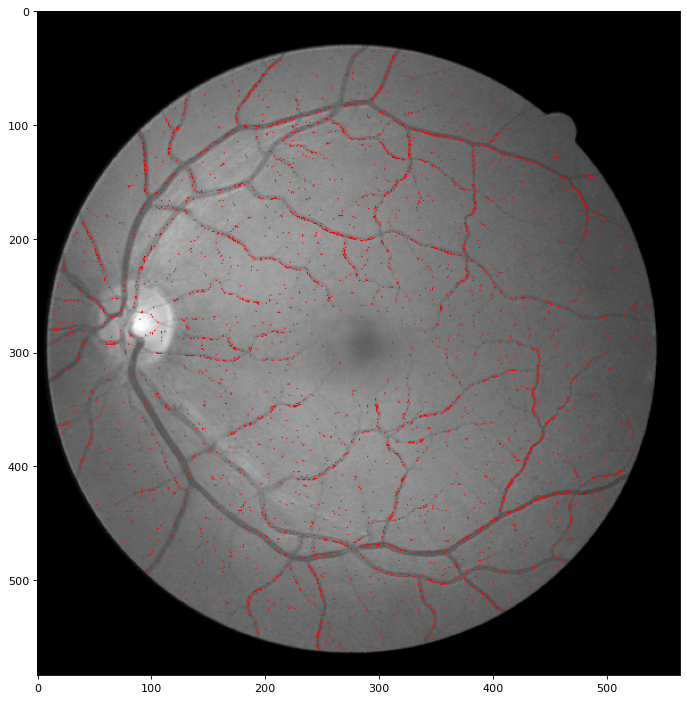

Accuracy score: 0.8754941451096971

F1 score: 0.15489906008577276

Confusion matrix:

     t/p      0     1 
        0 1177493 10052 
        1 159613 15549 
Sensivity: 0.08876925360523401
Specificity: 0.9915354786555457


(0.875, 0.155, 1177493, 10052, 159613, 15549)

In [5]:
from main import main


main(lgb='Num', plot_once=True, extra_features={'train': df_train, 'test': df_test})

## Cálculo con radio 1 a diferentes escalas

Columns: Index(['default_1:1', 'default_1:2', 'default_1:4', 'default_1:8'], dtype='object')


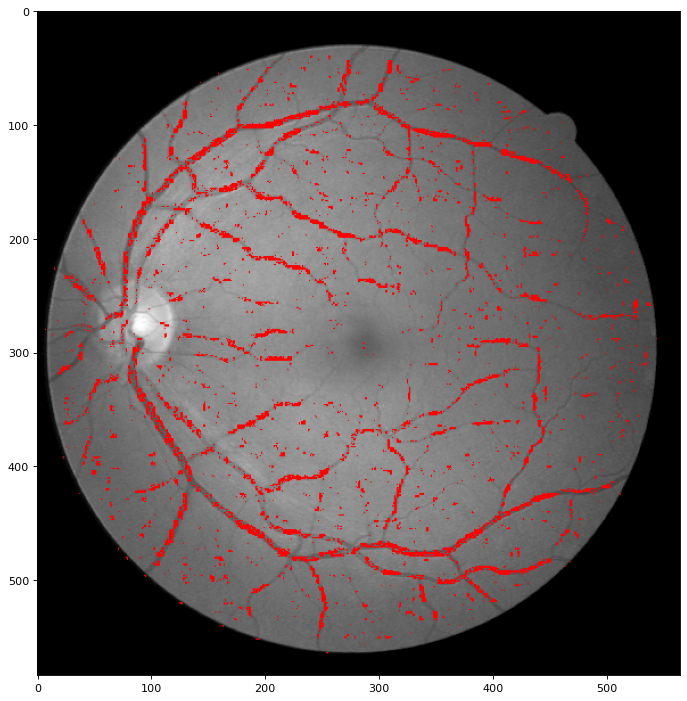

Accuracy score: 0.8909802327279451

F1 score: 0.42014628853344577

Confusion matrix:

     t/p      0     1 
        0 1160323 27222 
        1 121340 53822 
Sensivity: 0.3072698416323175
Specificity: 0.9770770791843677


(0.891, 0.42, 1160323, 27222, 121340, 53822)

In [6]:
PARAMETERS.N_SCALES = 4
PARAMETERS.X2SCALE = False
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
main(lgb='Num', plot_once=True)

In [7]:
df_train.max()

1:1_default_2    255
1:1_default_3    255
1:1_default_4    255
dtype: uint64

## RIU2

In [8]:
PARAMETERS.LBP_METHOD = 'riu2'
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.GRAY_INTENSITY = False
PARAMETERS.X2SCALE = False
PARAMETERS.CHANNEL = None
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = True

In [9]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for r in range(2, 5):
    db_path = f'../DB/{PARAMETERS.DATASET}/extra_features/radius/{r}'
    for filename in Path(db_path).glob('train_train_*'):   
        file_extension = \
            str(filename).replace('train_train_', '').split('/')[-1].replace('.pkl', '')
        properties = file_extension.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        lbp_method = properties[0]
        if lbp_method == 'riu2':
            df_train_temp = pd.read_pickle(filename, compression='gzip')
            df_test_temp = pd.read_pickle(str(filename).replace('train_train', 'train_test'), compression='gzip')
            df_train_temp = df_train_temp.drop(['Original', 'label'], axis=1)
            df_test_temp = df_test_temp.drop(['Original', 'label'], axis=1)
            df_train_temp.columns = [f'1:1_{lbp_method}_{r}']
            df_test_temp.columns = [f'1:1_{lbp_method}_{r}']
            df_train = pd.concat([df_train, df_train_temp], axis=1)
            df_test = pd.concat([df_test, df_test_temp], axis=1)

In [10]:
df_train

,1:1_riu2_2,1:1_riu2_3,1:1_riu2_4
0,8,12,16
1,8,12,16
2,8,12,16
3,8,12,16
4,8,11,15
...,...,...,...
226537,8,12,16
226538,8,12,16
226539,8,12,16
226540,8,12,16


In [11]:
for c in df_train.columns:
    df_train[c] = df_train[c].astype('int64')
df_train.max()

1:1_riu2_2    17
1:1_riu2_3    25
1:1_riu2_4    33
dtype: int64

Columns: Index(['riu2_1:1', '1:1_riu2_2', '1:1_riu2_3', '1:1_riu2_4'], dtype='object')


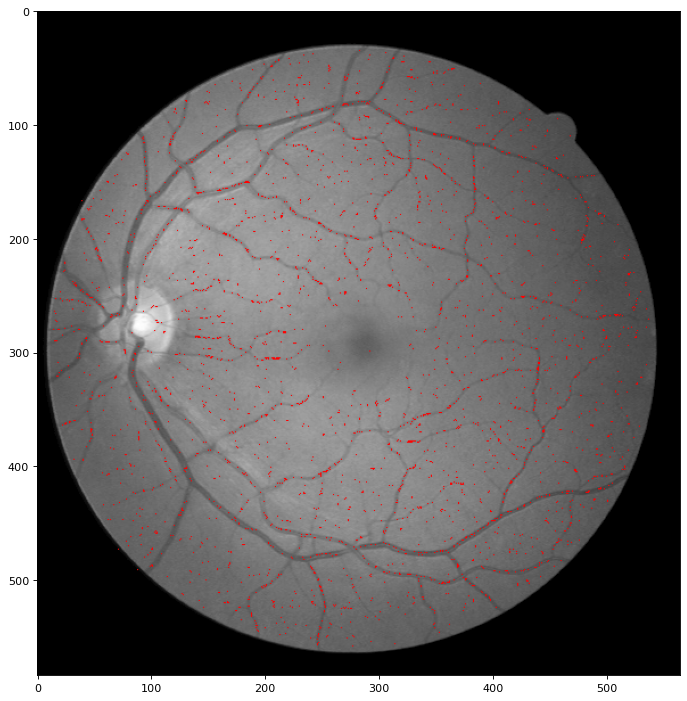

Accuracy score: 0.873882646819896

F1 score: 0.11508102012759316

Confusion matrix:

     t/p      0     1 
        0 1179671  7874 
        1 163987 11175 
Sensivity: 0.06379808405932794
Specificity: 0.9933695144184009


(0.874, 0.115, 1179671, 7874, 163987, 11175)

In [12]:
main(lgb='Num', plot_once=True, extra_features={'train': df_train, 'test': df_test})

Columns: Index(['riu2_1:1', 'riu2_1:2', 'riu2_1:4', 'riu2_1:8'], dtype='object')


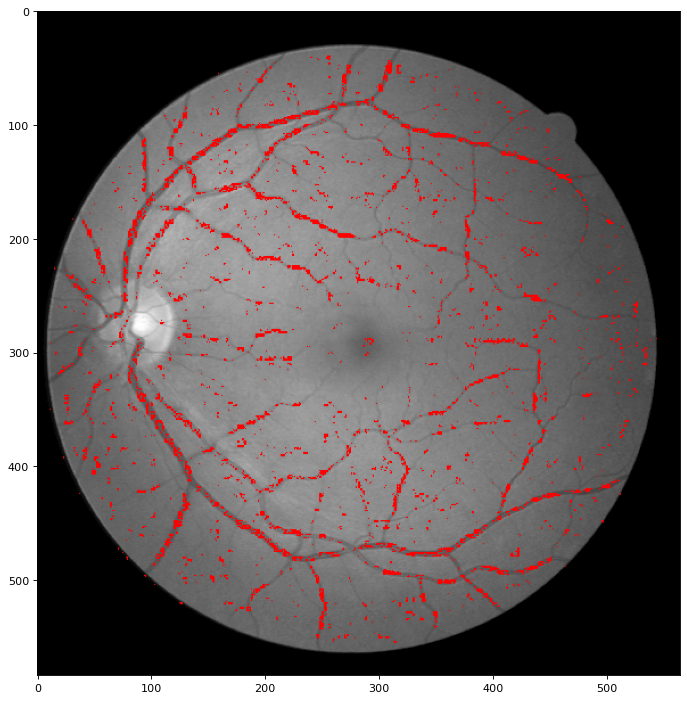

Accuracy score: 0.8843192263634075

F1 score: 0.33589053330468593

Confusion matrix:

     t/p      0     1 
        0 1165203 22342 
        1 135297 39865 
Sensivity: 0.22758931731768306
Specificity: 0.9811863971470555


(0.884, 0.336, 1165203, 22342, 135297, 39865)

In [13]:
PARAMETERS.N_SCALES = 4
PARAMETERS.X2SCALE = False
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
main(lgb='Num', plot_once=True)

## TODOS

In [15]:
PARAMETERS.METHOD = 'get_pyramid_dataset'
PARAMETERS.INTERPOLATION_ALGORITHM = 'lanczos'
PARAMETERS.BALANCE = False
PARAMETERS.N_SCALES = 1
PARAMETERS.GRAY_INTENSITY = False
PARAMETERS.X2SCALE = False
PARAMETERS.CHANNEL = None
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
PARAMETERS.PLOT = True

In [16]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for r in range(2, 5):
    db_path = f'../DB/{PARAMETERS.DATASET}/extra_features/radius/{r}'
    for filename in Path(db_path).glob('train_train_*'):   
        file_extension = \
            str(filename).replace('train_train_', '').split('/')[-1].replace('.pkl', '')
        properties = file_extension.replace(
            'get_pyramid_dataset', 'get-pyramid-dataset').replace(
            'get_datasets_by_scale', 'get-dataset-by-scale').split('_')
        lbp_method = properties[0]
        df_train_temp = pd.read_pickle(filename, compression='gzip')
        df_test_temp = pd.read_pickle(str(filename).replace('train_train', 'train_test'), compression='gzip')
        df_train_temp = df_train_temp.drop(['Original', 'label'], axis=1)
        df_test_temp = df_test_temp.drop(['Original', 'label'], axis=1)
        df_train_temp.columns = [f'1:1_{lbp_method}_{r}']
        df_test_temp.columns = [f'1:1_{lbp_method}_{r}']
        df_train = pd.concat([df_train, df_train_temp], axis=1)
        df_test = pd.concat([df_test, df_test_temp], axis=1)

In [17]:
df_train

,1:1_var_2,1:1_nriuniform_2,1:1_default_2,1:1_riu2_2,1:1_var_3,1:1_nriuniform_3,1:1_default_3,1:1_riu2_3,1:1_var_4,1:1_nriuniform_4,1:1_default_4,1:1_riu2_4
0,46,120,1,8,181,20,1,12,170,240,1,16
1,150,120,1,8,197,20,1,12,48,240,1,16
2,253,120,1,8,93,20,1,12,6,240,1,16
3,62,120,1,8,35,20,1,12,162,240,1,16
4,66,120,1,8,56,252,0,11,131,208,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
226537,214,128,254,8,248,32,254,12,245,0,254,16
226538,218,128,254,8,20,32,254,12,231,0,254,16
226539,255,128,254,8,41,32,254,12,208,0,254,16
226540,9,128,254,8,93,32,254,12,179,0,254,16


Columns: Index(['default_1:1', 'riu2_1:1', 'nriuniform_1:1', 'var_1:1', '1:1_var_2',
       '1:1_nriuniform_2', '1:1_default_2', '1:1_riu2_2', '1:1_var_3',
       '1:1_nriuniform_3', '1:1_default_3', '1:1_riu2_3', '1:1_var_4',
       '1:1_nriuniform_4', '1:1_default_4', '1:1_riu2_4'],
      dtype='object')


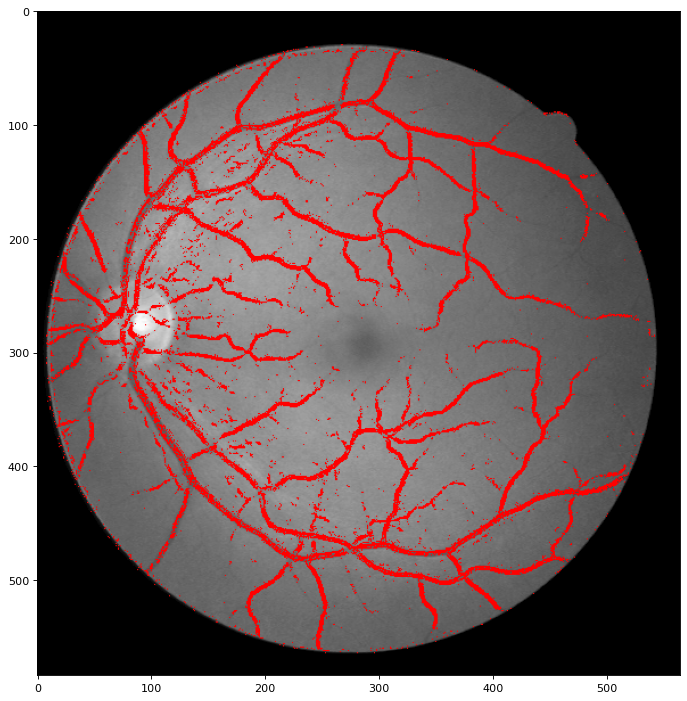

Accuracy score: 0.9176426040227282

F1 score: 0.6474500133507155

Confusion matrix:

     t/p      0     1 
        0 1147425 40120 
        1 72109 103053 
Sensivity: 0.5883296605428118
Specificity: 0.9662160170772476


(0.918, 0.647, 1147425, 40120, 72109, 103053)

In [19]:
main(lgb='Num', all_lbp=['default', 'riu2', 'nriuniform', 'var'], plot_once=True, extra_features={'train': df_train, 'test': df_test})

Columns: Index(['default_1:1', 'default_1:2', 'default_1:4', 'default_1:8', 'riu2_1:1',
       'riu2_1:2', 'riu2_1:4', 'riu2_1:8', 'nriuniform_1:1', 'nriuniform_1:2',
       'nriuniform_1:4', 'nriuniform_1:8', 'var_1:1', 'var_1:2', 'var_1:4',
       'var_1:8'],
      dtype='object')


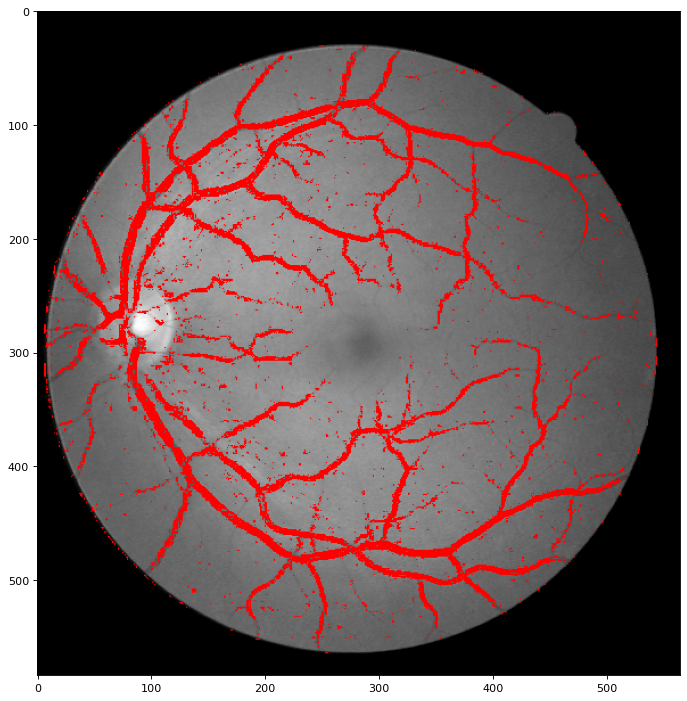

Accuracy score: 0.9150103433826934

F1 score: 0.6475750549256603

Confusion matrix:

     t/p      0     1 
        0 1140486 47059 
        1 68757 106405 
Sensivity: 0.6074662312602048
Specificity: 0.9603728700807127


(0.915, 0.648, 1140486, 47059, 68757, 106405)

In [20]:
PARAMETERS.N_SCALES = 4
PARAMETERS.X2SCALE = False
PARAMETERS.FILE_EXTENSION = PARAMETERS.update_file_extension(PARAMETERS)
main(lgb='Num', all_lbp=['default', 'riu2', 'nriuniform', 'var'], plot_once=True)